# Analysis of Brandeis classes in pandas
Here we show how to use pandas to analyze the Brandeis course data stored in data/courses

Some questions we can try to answer
* which faculty have taught the most students over the Fall2004-Summer2021 interval
* which departments offer the most courses
* which departments have had the most students
* how have the enrollents by departments changed
* etc, as in PA01

We'll show how to use pivot tables and aggregation to answer some of these.

This notebook shows how to use aggregation with groupby, pivot tables, and how to create new columns by applying some function to other columns.


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

First we read in the data from Fall 2004 to Summer 2021 with minimal info about each course

In [2]:
df = pd.read_csv('data/classes/courses.csv')
df

,subj,num,suf,format,term,code,inst,title,sec,enr
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


# Finding teachers with the most students
The easiest way to do this is with a groupby it shows the three stages of groupby
1. grouping of rows together based on the value in a column ('inst')
1. projection of those rows into a set of values (what value are we interested in) (enr)
1. aggregation of those values into a single value with some operator from arrays to numbers (sum)

In [3]:
fac = df.groupby('inst')['enr'].agg(sum)
fac



inst
Abariga, Samuel               19
Abbas, Yasmin                 10
Abbott, Laurence              51
Abdou, Jennifer               22
Abdur-Rahman, Aliyyah        666
                            ... 
Zotz, James A                190
de Boef Miara, Maria         450
van Maasakkers, Mattijs       73
von Mayrhauser, Jennifer     109
von Mering, Sabine          1571
Name: enr, Length: 3164, dtype: int64

## Sorting the Series
We can sort the values if we want (and here I am then reversing them by iterating with a step of -1 through the array) and we can use .head(N) and .tail(N) to look at either end of the sorted series.

In [4]:
fac = fac.sort_values(ascending=False)
fac.head(20)


inst
Coiner, Harry                8819
Dolnik, Milos                8355
Kosinski-Collins, Melissa    6947
Wright, Ellen                4971
Novack, Claudia              4598
Mascall, Kristen             4577
Di Lillo, Antonella          4392
Teuber, Andreas              4362
Van Der Meid, J.             4108
Fournier, Stephen            3946
Anderson, Brenda             3891
Redenius, Scott              3831
Canella, Alfonso             3758
Hickey, Timothy              3672
Morris, James                3495
Bayone, Edward               3475
Breen, Daniel                3474
Pontrello, Jason             3365
Simister, Neil               3335
Cohen, Jacob                 3210
Name: enr, dtype: int64

In [5]:
fac.head(1010).tail(10)

inst
Paquin, Jessica         127
Sivachenko, Andrey      127
Gershenson, Anne        127
Sizelove, Kimberly      126
Schroeder, Bendta       126
Lenowitz, Jeffrey A.    126
Salameh, Franck         126
Hemdal, Deborah         125
Gourko, Helena          125
Collins, Barbara        125
Name: enr, dtype: int64

# Finding departments (subj) with the most students per year
Let's do another example of aggregation, to sum the enrollments for each department over all years

In [6]:
depts = df.groupby('subj').enr.agg(sum)
depts

subj
AAAS         4347
AAAS/ENG       67
AAAS/FA        52
AAAS/HIS       48
AAAS/WGS      322
            ...  
UWS         14015
WGS           282
WMGS         2697
WMNS          122
YDSH          424
Name: enr, Length: 180, dtype: int64

It is more interesting to look at enrollments per year

In [7]:
depts = depts.apply(lambda x: x/17)
depts

subj
AAAS        255.705882
AAAS/ENG      3.941176
AAAS/FA       3.058824
AAAS/HIS      2.823529
AAAS/WGS     18.941176
               ...    
UWS         824.411765
WGS          16.588235
WMGS        158.647059
WMNS          7.176471
YDSH         24.941176
Name: enr, Length: 180, dtype: float64

In [8]:
depts = depts.sort_values()
depts = depts[::-1]
depts.head(20)

subj
HS      4158.235294
ECON    2735.235294
BIOL    2519.294118
BUS     2293.647059
CHEM    2209.000000
FIN     1765.352941
MATH    1462.941176
PSYC    1433.058824
COSI    1297.235294
FA      1119.941176
POL     1090.823529
ENG     1072.882353
PHYS    1058.941176
HIST    1057.352941
ANTH    1032.117647
SOC     1006.941176
MUS      972.470588
THA      917.235294
PHIL     914.882353
PE       872.294118
Name: enr, dtype: float64

# Restricting to a time interval
Let's do the same but just look for the past 4 years, i.e. from Fall2017 to Summer 2021 which are the codes 1173 to 1212.


In [9]:
df2 = df[df['code']>=1173]
df2

,subj,num,suf,format,term,code,inst,title,sec,enr
1850,EL,60,A,LAB,Fall 2017,1173,"Kramer Theodorou, Rachel",EXPERIENTIAL LEARNING PRACTICM,1,1
1851,EL,66,A,LAB,Fall 2017,1173,"Malo, Lucas",EXPERIENTIAL LEARNING PRACTICM,1,5
1852,EL,16,A,LAB,Fall 2017,1173,"McPhee, Marcia",EXPERIENTIAL LEARNING PRACTICM,1,6
1853,EL,13,A,LAB,Fall 2017,1173,"Dellelo, Mark",MULTIMEDIA STORYTELLING,1,7
1854,EL,10,A,LAB,Fall 2017,1173,"von Mering, Sabine",EXPERIENTIAL LEARNING PRACTICM,1,18
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


## aggregate by summing the enrollments for each subject

In [10]:
depts = df2.groupby(['subj'])['enr'].agg(sum)
depts = depts.sort_values()
depts = depts[::-1]
depts.head(20)
                     


subj
HS      19626
BIOL    12060
BUS     11436
ECON     9982
CHEM     8985
COSI     8479
MATH     7174
FIN      6922
PSYC     5746
HWL      4939
ANTH     4219
FA       3983
PHYS     3956
PHIL     3881
MUS      3824
ENG      3769
SOC      3761
POL      3567
UWS      3551
HIST     3457
Name: enr, dtype: int64

# Time series
Now lets try to get time series data and plot the enrollments in a department by year.
Let's first add a new column giving the academic year, so Fall2004 and Spring 2005 and Summer2005 would all be 2004


In [11]:
def code2year(code):
    ''' returns the academic year corresponding to a code'''
    code=str(code)
    year = int("20"+code[1:-1])
    if code[-1]!='3':
        year = year -1
    return year
print(code2year('1042'))



2003


### the original data frame has no 'year' column

In [12]:
df

,subj,num,suf,format,term,code,inst,title,sec,enr
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3
...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3


### create a new column for the year
We can apply the code2year function to each of the integers in the 'code' column to get a new series,
and then assign that series to be a new column 'year' of the df dataframe

In [13]:
df['year'] = df['code'].apply(code2year)
df

,subj,num,suf,format,term,code,inst,title,sec,enr,year
0,NEJS,188,A,LEC,Fall 2004,1043,"Levy, Avigdor",RISE/DECLINE:OTTOMAN EMP,1,32,2004
1,CHEM,121,A,LEC,Fall 2004,1043,"Foxman, Bruce","INORGANIC CHEM I, LECS.",1,18,2004
2,CHEM,130,A,LEC,Fall 2004,1043,"Yu, Jinquan",ADV ORG. CHEM: STRUCTURE,1,14,2004
3,COMP,1,A,LEC,Fall 2004,1043,"Ruesch, Gordon",COMPOSITION,3,11,2004
4,MUS,118,A,STD,Fall 2004,1043,"Ray, Mary",SENIOR RECITAL I,1,3,2004
...,...,...,...,...,...,...,...,...,...,...,...
35201,BIOL,26,A,LEC,Summer 2021,1212,"Kosinski-Collins, Melissa",Plant Biology,1,9,2020
35202,ECON,28,B,LEC,Summer 2021,1212,"AlMehdar, Mohammed",The Global Economy,1,4,2020
35203,PHIL,1,A,LEC,Summer 2021,1212,"Lupu, Peter",Introduction to Philosophy,1,3,2020
35204,AAAS,160,B,LEC,Summer 2021,1212,"Plumb, Betsy Loren",If We Must Die: War and Military Service in Af...,1,3,2020


# Group by the year and subject
This creates a new Series with a multi-index containing both year and subject

In [21]:
depts_enr = df.groupby(['year','subj']).enr.agg(sum)
depts_enr


year  subj
2004  AAAS    170
      AMST    901
      ANTH    969
      ARBC    101
      BCHM    179
             ... 
2020  SOC     907
      THA     511
      UWS     746
      WGS     282
      YDSH     24
Name: enr, Length: 1674, dtype: int64

# Reset to a single index
We can use the reset_index method to make the subj part of the index into a column


In [15]:
depts_enr = depts_enr.reset_index(level=['subj'])
depts_enr

,subj,enr
year,,
2004,AAAS,170
2004,AMST,901
2004,ANTH,969
2004,ARBC,101
2004,BCHM,179
...,...,...
2020,SOC,907
2020,THA,511
2020,UWS,746


# Create a Pivot table of enrollments by department and year
Now we do the usual construction of a pivot table

In [16]:
depts_pt =  pd.pivot_table(depts_enr, values='enr', index=["year"], columns=["subj"])
depts_pt

subj,AAAS,AAAS/ENG,AAAS/FA,AAAS/HIS,AAAS/WGS,AAPI,AAPI/HIS,AAPI/WGS,AAS/AAPI,AMST,...,SQS,SYS,THA,TYP,USEM,UWS,WGS,WMGS,WMNS,YDSH
year,,,,,,,,,,,,,,,,,,,,,
2004,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,901.0,...,NaN,NaN,1009.0,NaN,866.0,489.0,NaN,NaN,122.0,51.0
2005,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,907.0,...,NaN,NaN,1062.0,128.0,842.0,400.0,NaN,165.0,NaN,35.0
2006,370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,997.0,...,NaN,NaN,1082.0,144.0,864.0,495.0,NaN,210.0,NaN,32.0
2007,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,756.0,...,NaN,NaN,1037.0,151.0,804.0,822.0,NaN,187.0,NaN,29.0
2008,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,819.0,...,NaN,NaN,972.0,147.0,897.0,869.0,NaN,141.0,NaN,5.0
2009,197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,760.0,...,NaN,22.0,1009.0,141.0,NaN,917.0,NaN,149.0,NaN,31.0
2010,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744.0,...,NaN,27.0,1002.0,154.0,NaN,866.0,NaN,191.0,NaN,37.0
2011,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,579.0,...,NaN,18.0,1071.0,154.0,NaN,989.0,NaN,168.0,NaN,40.0
2012,277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696.0,...,NaN,22.0,986.0,147.0,NaN,939.0,NaN,163.0,NaN,33.0


# Plot selected columns of the pivot table
We can now select a few columns and plot them!

Text(0.5, 1.0, 'STEM Enrollments from 2004-2020')

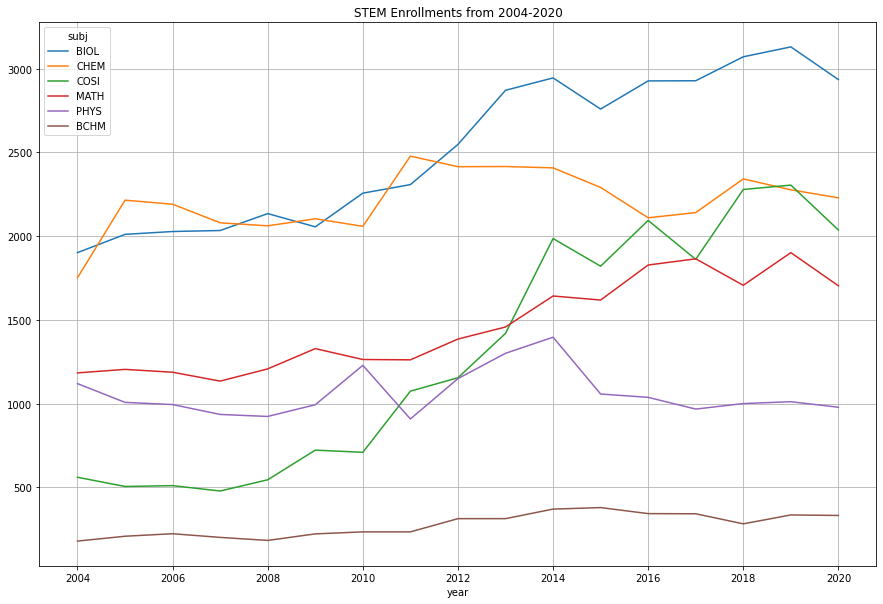

In [17]:
depts_pt[['BIOL','CHEM','COSI','MATH','PHYS','BCHM']].plot(figsize=(15,10))
plt.grid()
plt.title("STEM Enrollments from 2004-2020")